<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [3]:
# Answer:
# 979 rows, 6 columns
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [4]:
# Answer:
# float, object, object, object, int, object
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [5]:
# Answer:
# Around 121 (mins)
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [6]:
# Answer:
# Shortest movie is 'Freaks' with 64 mins runtime, while longest movie is 'Hamlet' with 242 mins runtime.
movies.sort_values('duration', ascending=True)

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

<AxesSubplot: ylabel='Frequency'>

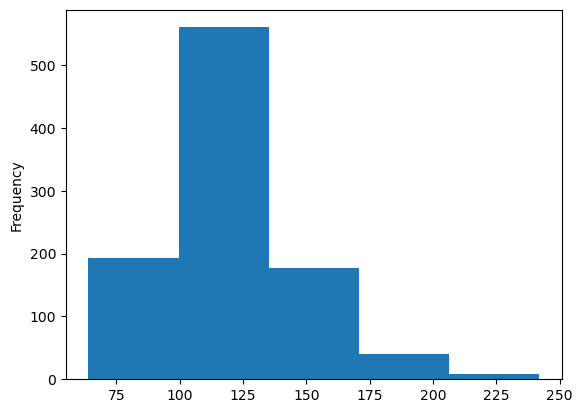

In [7]:
# Answer:
movies['duration'].plot.hist(bins=5)

#### Use a box plot to display that same data.

<AxesSubplot: >

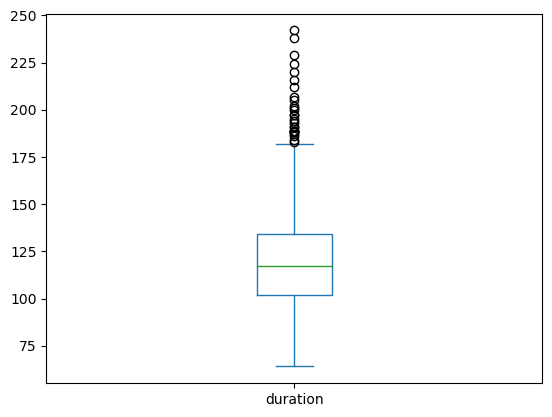

In [8]:
# Answer:
movies['duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [9]:
# Answer:

#APPROVED      47
#G             32
#GP             3
#NC-17          7
#NOT RATED     65
#PASSED         7
#PG           123
#PG-13        189
#R            460
#TV-MA          1
#UNRATED       38
#X              4

movies.groupby(['content_rating'])['title'].count()

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

<AxesSubplot: title={'center': 'Amount of Movies by Content Rating'}, xlabel='Ratings', ylabel='Count'>

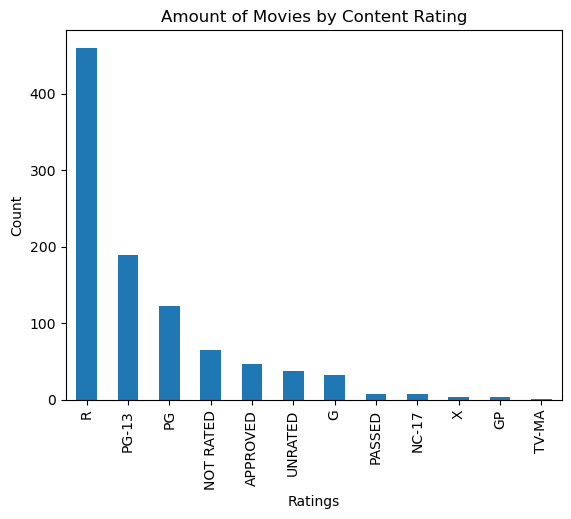

In [10]:
# Answer:
movies['content_rating'].value_counts().plot(kind='bar', title='Amount of Movies by Content Rating', xlabel='Ratings', ylabel='Count')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [11]:
# Answer:
renamed = ['NOT RATED', 'APPROVED', 'PASSED', 'GP']
movies.loc[movies['content_rating'].isin(renamed),'content_rating'] = 'UNRATED'

movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [12]:
# Answer:
renamed = ['X','TV-MA']
movies.loc[movies['content_rating'].isin(renamed),'content_rating'] = 'NC-17'

movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [13]:
# Answer:
movies.info()

# 0, 0, 3, 0, 0, 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [14]:
# Answer:
movies[movies['content_rating'].isnull()]

movies.loc[movies['content_rating'].isnull(),'content_rating'] = 'UNRATED'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [15]:
# Answer:

movies[movies['duration'] >= 120]['star_rating'].mean() # 7.94
movies[movies['duration'] < 120]['star_rating'].mean() # 7.83

# The average rating for movies 2 hours or longer is greater than movies that are shorter than 2 hours

7.838666666666657

#### Use a visualization to detect whether there is a relationship between duration and star rating.

<AxesSubplot: xlabel='duration', ylabel='star_rating'>

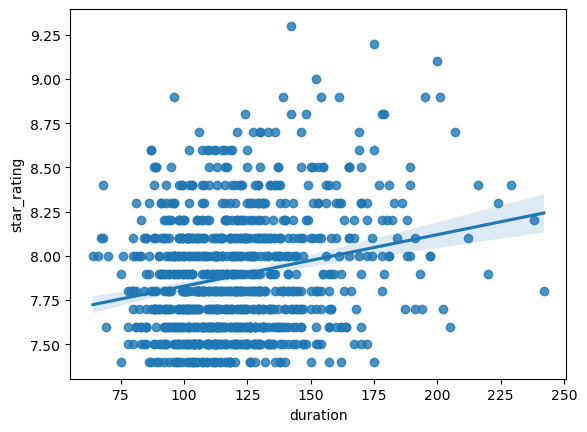

In [16]:
# Answer:
import seaborn as sns

# movies.plot(kind='scatter',x='duration',y='star_rating')
sns.regplot(data=movies,x='duration',y='star_rating')

# There seem to be a postive relationship between 'duration' and 'star_rating'.

#### Calculate the average duration for each genre.

In [17]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

<AxesSubplot: xlabel='duration', ylabel='content_rating'>

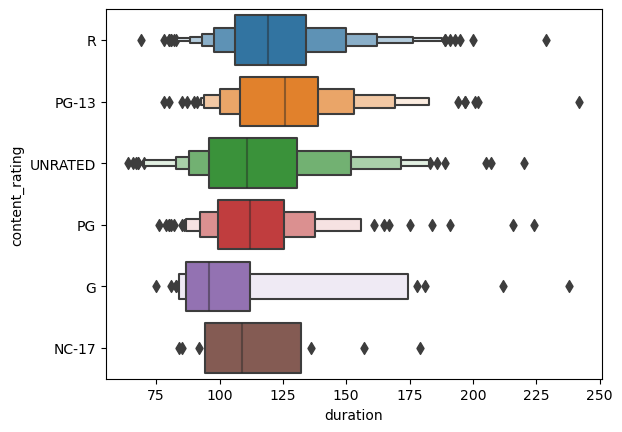

In [18]:
# Answer:
sns.boxenplot(data=movies,x='duration',y='content_rating')

#### Determine the top rated movie (by star rating) for each genre.

In [19]:
# Answer:
movies.groupby('genre')[['title','star_rating']].max()

,title,star_rating
genre,,
Action,Yojimbo,9.0
Adventure,True Grit,8.9
Animation,Wreck-It Ralph,8.6
Biography,Walk the Line,8.9
Comedy,Zombieland,8.6
Crime,Zodiac,9.3
Drama,Zulu,8.9
Family,Willy Wonka & the Chocolate Factory,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [20]:
# Answer:
movies[movies['title'].duplicated()]

tgwdt = movies[movies['title'] == 'The Girl with the Dragon Tattoo']
dra = movies[movies['title'] == 'Dracula']
lm = movies[movies['title'] == 'Les Miserables']
tg = movies[movies['title'] == 'True Grit']

pd.set_option("display.max_colwidth", None)

tgwdt['actors_list'] # Different Actor List
dra['actors_list'] # Different Actor List
lm['actors_list'] # Different Actor List
tg['actors_list'] # Different Actor List

# All 4 movies with duplicated titles are unique movies with different actors

662    [u'Jeff Bridges', u'Matt Damon', u'Hailee Steinfeld']
936          [u'John Wayne', u'Kim Darby', u'Glen Campbell']
Name: actors_list, dtype: object

## Calculate the average star rating for each genre, but only include genres with at least 10 movies

#### Option 1: manually create a list of relevant genres, then filter using that list

In [21]:
# Answer:
movies.groupby('genre')['title'].count() >= 10
relevant = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Horror','Mystery']

movies[movies['genre'].isin(relevant)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [22]:
# Answer:
genre_count = movies.genre.value_counts()

movies[movies['genre'].map(genre_count >= 10)].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [23]:
# Answer:
movies_series = movies.groupby('genre')['genre'].count() >= 10
movies_avg_rating = movies.groupby('genre')['star_rating'].mean()
movies_avg_rating[movies_series]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [24]:
# Answer:
movies_agg = movies.groupby('genre')['star_rating'].agg(['count','mean'])
movies_agg[movies_agg["count"] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [85]:
# Convert Series with column 'actors_list' into a python list
actor_lists = list(movies['actors_list'])

# Initialise dictionary
actor_dict = {}

# Converting actor_lists into a python dictionary of actor appearances
for actor_list in actor_lists:
    cleaned_actor_list = actor_list.replace("u'","").replace('u"','')\
    .replace("'","").replace('"','')\
    .replace('[','').replace(']','')
    
    split_list = cleaned_actor_list.split(',')
    
    for actor in split_list:
        if actor in actor_dict:
            actor_dict[actor] += 1
        else:
            actor_dict[actor] = 1

# converting dictionary into dataframe
actors_df = pd.DataFrame(actor_dict.items(), columns=['Actor','Apperance Count'])

actors_df.sort_values('Apperance Count',ascending=False).head(10)

# Robert De Niro is the top appearing actor in the movie reviews list follow by Tom Hanks.

,Actor,Apperance Count
49,Robert De Niro,13
37,Tom Hanks,12
18,Clint Eastwood,11
6,Al Pacino,10
679,Johnny Depp,10
9,Christian Bale,9
27,Brad Pitt,9
31,Leonardo DiCaprio,9
58,James Stewart,9
1189,Denzel Washington,8
